### Simple Linear Regression Mini Project - Charbel BOU MALHAM

##### Project Title: Linear Relationship between Sales and Advertisig

##### Overview  

In this project i build a simple linear regression between 2 continuous variables

##### Linear Regression

Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Simple Linear Regression technique where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.

#### Simple Linear Regression overview

Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables.

In this project, there is one independent or input variable which represents the Sales data and is denoted by X. Similarly, there is one dependent or output variable which represents the Advertising data and is denoted by y. We want to build a linear relationship between these variables. This linear relationship can be modelled by mathematical equation of the form:- Y = β0 + β1*X ------------- (1)

In this equation, X and Y are called independent and dependent variables respectively,

β1 is the coefficient for independent variable and

β0 is the constant term.

β0 and β1 are called parameters of the model.

For simplicity, we can compare the above equation with the basic line equation of the form:-

               y = ax + b       ----------------- (2)

We can see that

slope of the line is given by, a = β1, and

intercept of the line by b = β0.

In this Simple Linear Regression model, we want to fit a line which estimates the linear relationship between X and Y. So, the question of fitting reduces to estimating the parameters of the model β0 and β1.

##### Ordinary Least Square Method

As I have described earlier, the Sales and Advertising data are given by X and y respectively. We can draw a scatter plot between X and y which shows the relationship between them.

Now, our task is to find a line which best fits this scatter plot. This line will help us to predict the value of any Target variable for any given Feature variable. This line is called Regression line.

We can define an error function for any line. Then, the regression line is the one which minimizes the error function. Such an error function is also called a Cost function.

#### Cost Function

We want the Regression line to resemble the dataset as closely as possible. In other words, we want the line to be as close to actual data points as possible. It can be achieved by minimizing the vertical distance between the actual data point and fitted line. I calculate the vertical distance between each data point and the line. This distance is called the residual.

So, in a regression model, we try to minimize the residuals by finding the line of best fit. The residuals are represented by the vertical dotted lines from actual data points to the line.

We can try to minimize the sum of the residuals, but then a large positive residual would cancel out a large negative residual. For this reason, we minimize the sum of the squares of the residuals.

Mathematically, we denote actual data points by yi and predicted data points by ŷi. So, the residual for a data point i would be given as di = yi - ŷi

Sum of the squares of the residuals is given as:

			D = Ʃ di**2       for all data points
            

This is the Cost function. It denotes the total error present in the model which is the sum of the total errors of each individual data point.

We can estimate the parameters of the model β0 and β1 by minimize the error in the model by minimizing D. Thus, we can find the regression line given by equation (1).

This method of finding the parameters of the model and thus regression line is called Ordinary Least Square Method.


##### The problem statement

The aim of building a machine learning model is to solve a problem and to define a metric to measure model performance.

The problem is to model and investigate the linear relationship between Sales and Advertising dataset for a dietary weight control product.

I have used two performance metrics RMSE (Root Mean Square Value) and R2 Score value to compute our model performance.

This Project will be Detailed Step by Step



 #### Dataset

 The data set has been imported from the econometrics website :

http://www.econometrics.com/intro/sales.htm

#####  Import Necessary Libraries

• Numpy – It provides a fast numerical array structure and operating functions.

• pandas – It provides tools for data storage, manipulation and analysis tasks.

• Scikit-Learn – The required machine learning library in Python.

• Matplotlib – It is the basic plotting library in Python. It provides tools for making plots.

In [59]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
%matplotlib inline

In [61]:
# Download the dataset and convert it to csv

with open("sales_data.txt", "r") as file:
    lines = file.readlines()

# Split each line into two values and create CSV format lines
csv_data = []
for line in lines:
    values = line.strip().split()  # Split values by spaces
    csv_line = ",".join(values)    # Join values with a comma
    csv_data.append(csv_line)

# Write the CSV data to a new file
with open("data.csv", "w") as file:
    file.write("\n".join(csv_data))
    
df=pd.read_csv("data.csv",header=None)

##### Exploratory data analysis (EDA)

In [62]:
# Shape of the data
df.shape

(36, 2)

In [63]:
# Head of the data
df.head()

,0,1
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [64]:
# Renapme the columns
df.columns=["Sales","Advertising"]
df.head()

,Sales,Advertising
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [65]:
# Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes


In [66]:
# Get a short description of the data
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000



### Define Independent and Dependent Variables

In this project, I refer Independent variable as Feature variable and Dependent variable as Target variable. These variables are also recognized by different names as follows: -
Independent variable

Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. We can denote it as:-

Independent or Input variable (X) = Feature variable = Predictor variable
Dependent variable

Dependent variable is also called Output variable and is denoted by y.

Dependent variable is also called Target variable or Response variable. It can be denoted it as follows:-

Dependent or Output variable (y) = Target variable = Response variable


In [68]:
X=df["Sales"].values
y=df["Advertising"].values


##### Visual Exploratory data analysis (EDA)

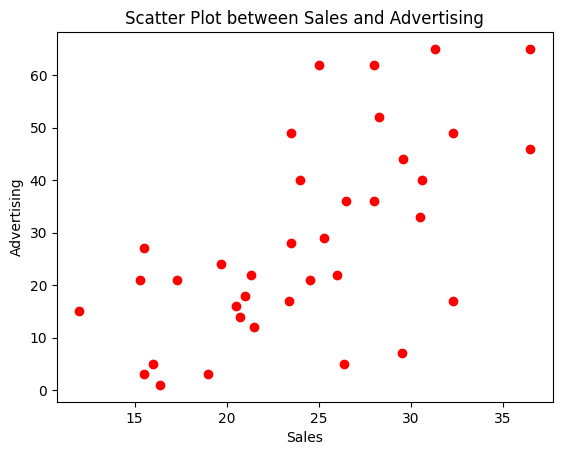

In [69]:
plt.scatter(X, y, color = 'red')
plt.title('Scatter Plot between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.show()

#### Checking Dimensions of X and 

In [70]:
print("X shape: ",X.shape)
print("y shape: ",y.shape)

X shape:  (36,)
y shape:  (36,)


In [71]:
# Reshape the data
X=X.reshape(-1,1)
y=y.reshape(-1,1)
print("X shape: ",X.shape)
print("y shape: ",y.shape)

X shape:  (36, 1)
y shape:  (36, 1)


##### Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 42)

In [73]:
# Print the dimensions of X_train, X_test, y_train, y_test
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (27, 1)
y_train shape:  (27, 1)
X_test shape:  (9, 1)
y_test shape:  (9, 1)


#### Training the model & Predict on Test set

In [74]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create an object of LinearRegression
lm=LinearRegression()

# Train the model using training Data
lm.fit(X_train,y_train)

# Predict output on the test data

y_hat = lm.predict(X_test)

#### Inspect the Coefficient and Intercept

In [75]:
lm_coef=lm.coef_
lm_intercept=lm.intercept_
print("Model Coefficient: ",lm_coef)
print("Model Intercept: ",lm_intercept)

Model Coefficient:  [[1.66268698]]
Model Intercept:  [-12.52197777]


So now our model : Y = β0 + β1*X

β0 = -12.52197777 & β1 = 1.66268698

Linear model is : Y = -12.52197777 + 1.66268698*X

#### Making Predictions

In [76]:
lm.predict(X)[0:5]

array([[ 7.43026596],
       [21.56310527],
       [22.39444876],
       [13.24967038],
       [12.91713299]])

### Evaluation Metrics to mesure the Model performance

##### MSE (Mean Squared Error) 
for regression calculates the average squared difference between predicted and actual values.
It is a widely used metric to evaluate the performance of regression models, with lower values indicating better accuracy.
MSE is computed by averaging the squared differences between each prediction and its corresponding true value.

In [77]:
# Calculate the Mean squared error

from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test,y_hat)
print("Mean Squared Error: ",mse)

Mean Squared Error:  146.5494979348981



##### R2 Score

R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.

Mathematically,

R2 Score = Explained Variation/Total Variation

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.


In [78]:
# Calculate the R^2 score

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_hat)
print("R^2 Score : {:.3f}".format(r2)) 

R^2 Score : 0.589


#### Model Interpretation

The MSE value has been found to be 146.549. It means the standard deviation power 2 for our prediction is 146.549. So, sometimes we expect the predictions to be off by more than sqrt(146.549) and other times we expect less than sqrt(146.549). So, the model is not good fit to the data.

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .589.
This value indicates that our model explqins 58.9% of the variation in our dependent variable. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide good fit to the data.

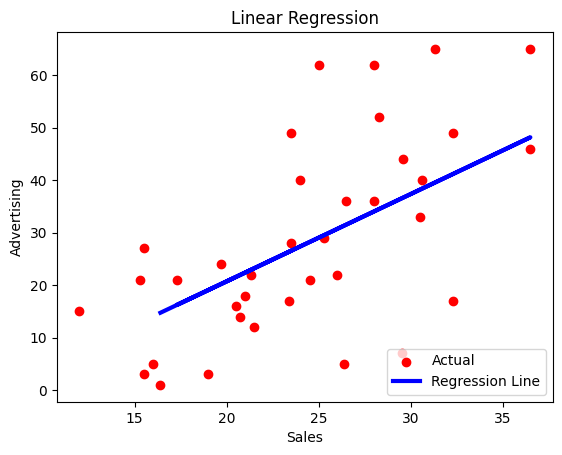

In [79]:
# Plotting the Regression Line using matplot lib
plt.scatter(X, y, color = 'red',label="Actual")
plt.plot(X_test, y_hat, color = 'blue',linewidth=3,label="Regression Line")
plt.title('Linear Regression')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc="lower right")
plt.show()


#### Residual analysis

A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by the scatter-plot of these residuals that is called "residual plot".

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

If we take a look at the generated ‘Residual errors’ plot, we can clearly see that the train data plot pattern is non-random. Same is the case with the test data plot pattern. So, it suggests a better-fit for a non-linear model.


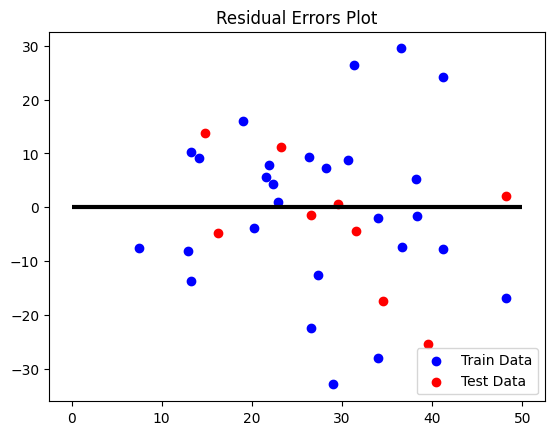

In [80]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c = 'blue', label = "Train Data")
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c = 'red', label = "Test Data")
plt.hlines(xmin=0,xmax=50,linewidth = 3, y = 0,color="black")
plt.title("Residual Errors Plot")
plt.legend(loc = 'lower right')
plt.show()


#### Overfitting and Underfitting

In [81]:
training_set_score=lm.score(X_train,y_train)
test_set_score=lm.score(X_test,y_test)

print("Training set score: {:.4f}".format(training_set_score))

print("Test set score: {:.4f}".format(test_set_score))

Training set score: 0.3070
Test set score: 0.5888


The model performs poorly on the test set with a score of 0.3070, this is an indication of underfitting meaning that the model was not able to properly learn the relationships, this may be due to many reasons ( lack of observations, lack of features to use in order to predict)